In [1]:
import sys
sys.path.append('../')
from xppcall import xpprun, read_pars_values_from_file

In [2]:
from scipy import *
from scipy.sparse import csr_matrix, lil_matrix
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle
import subprocess
import conley_functions
from mpl_toolkits.mplot3d import Axes3D
import conley_functions as cf

In [29]:
xlo=-15;xhi=15;ylo=-15;yhi=15;zlo=-15;zhi=15
grid=[]
delta = 30.
for i in range(int((xhi-xlo)/delta)):
    for j in range(int((yhi-ylo)/delta)):
        for k in range(int((yhi-ylo)/delta)):
            gc=(xlo+i*delta, ylo+j*delta, zlo+k*delta)
            grid.append(gc)
        
time = 500
data = np.array([[0]*3])
data_length_list = []
for gc in grid:
    npa, vn = xpprun('lorenz.ode', inits={'x':gc[0],'y':gc[1], 'z':gc[2]}, parameters={'total':time}, clean_after=True)
    data = np.append(data, npa[:,1:], axis=0)  
#     data.append(npa[:,1:])  
    data_length_list.append(npa.shape[0])
    
    
# gc = [sqrt(8/3*26), sqrt(8/3*26), 26]
# npa, vn = xpprun('lorenz.ode', inits={'x':gc[0],'y':gc[1], 'z':gc[2]}, parameters={'total':300}, clean_after=True)
# # cds.update_cubesandgraph(npa[:,1:]-np.min(data), [npa[:,1:].shape[0]+1])
# data = np.append(data, npa[:,1:], axis=0)  
# data_length_list.append(npa.shape[0])
# gc = [-sqrt(8/3*26), -sqrt(8/3*26), 26]
# npa, vn = xpprun('lorenz.ode', inits={'x':gc[0],'y':gc[1], 'z':gc[2]}, parameters={'total':300}, clean_after=True)
# # cds.update_cubesandgraph(npa[:,1:]-np.min(data), [npa[:,1:].shape[0]+1])
# data = np.append(data, npa[:,1:], axis=0)  
# data_length_list.append(npa.shape[0])
data = data[1:,:]

In [30]:
arrdata = np.array(data)
datashifted = data-np.min(data)
# np.savetxt("datashifted.txt", datashifted, delimiter=',')
# np.savetxt("data_length_list.txt", data_length_list, delimiter=',')
# datashifted = np.loadtxt("datashifted.txt", delimiter=',')
# data_length_list = np.loadtxt("data_length_list.txt", delimiter=',')

In [31]:
data.shape

(20001, 3)

<IPython.core.display.Javascript object>


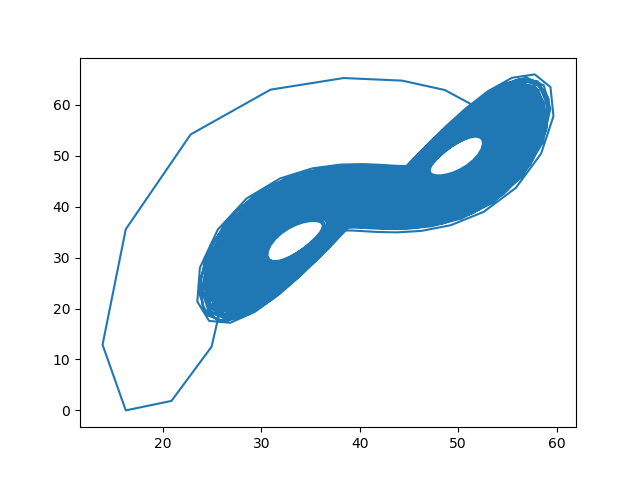

In [32]:
%matplotlib notebook

plt.plot(datashifted[:,0], datashifted[:,1])

In [51]:
A=np.array(cds.bins)[np.array(cds.bins)[:,0]>90,:]

<IPython.core.display.Javascript object>


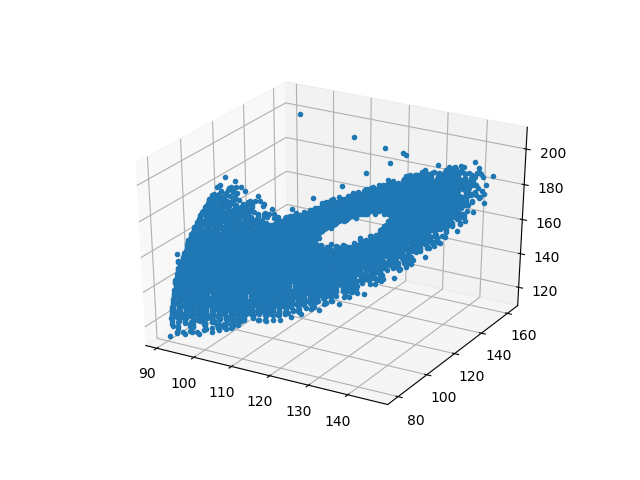

In [52]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.canvas.draw()
plt.plot(A[:,0],A[:,1], A[:,2], '.', label=i+1)
plt.show()

In [53]:
Ap2=[]
for a in A:
    Ap2.append(tuple(a))

In [54]:
S2 = cds.invariantPart(Ap2)

In [55]:
Sa2=np.array(list(S2))

In [56]:
# Sa1

<IPython.core.display.Javascript object>


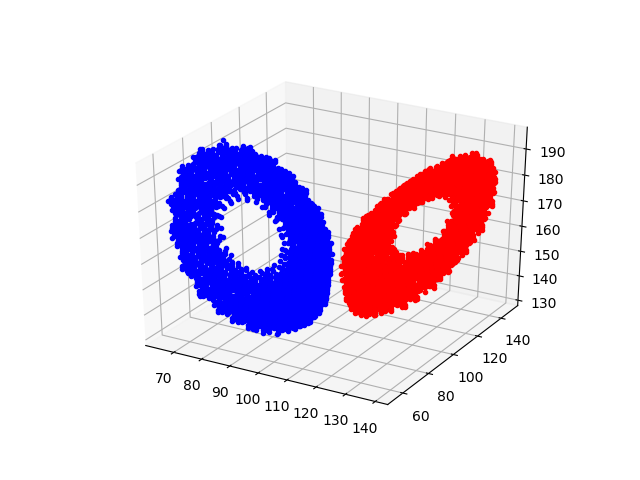

In [57]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.canvas.draw()
plt.plot(Sa1[:,0],Sa1[:,1], Sa1[:,2], '.', c='blue', label=i+1)
plt.plot(Sa2[:,0],Sa2[:,1], Sa2[:,2], '.', c='red', label=i+1)
plt.show()

In [58]:
P1, P0, Pbar1, Pbar0 = cds.index_pair(Ap2)

In [59]:
        i=0
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes',# '-i',
#                                  'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)
        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
            print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1

Calculating homology
           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 2769 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 286 cubes read.
           Computing X\A... 286 cubes removed from X, 2483 left.
           Restricting A to the neighbors of X\A... 0 cubes removed, 286 left.
           50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
           Expanding A in X...        373       746      1119      1492      1865      2238*         0       373       746      1119      1492      1865      2238      2611 1872 cubes moved to A, 611 left in X\A.
           Restricting A to the neighbors of X\A... 987 cubes removed, 1171 left.
 

<IPython.core.display.Javascript object>


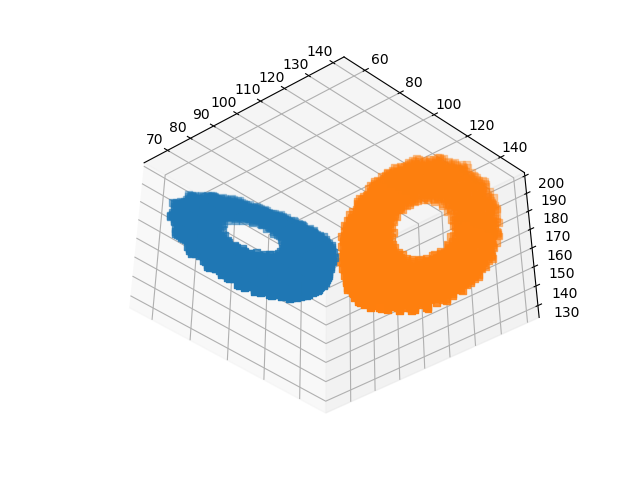

In [61]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.canvas.draw()
ax.scatter(Sa1[:,0],Sa1[:,1], Sa1[:,2],marker='s',s=25)
ax.scatter(Sa2[:,0],Sa2[:,1], Sa2[:,2],marker='s',s=25)
plt.show()

In [207]:
H=nx.subgraph(cds.G, Ap)
scc=nx.strongly_connected_components(H)

In [208]:
RCs = []
for cc in scc:
    if len(list(H.subgraph(cc).nodes()))>1:
        RCs.append(list(H.subgraph(cc).nodes()))

In [209]:
len(RCs)

5

<IPython.core.display.Javascript object>


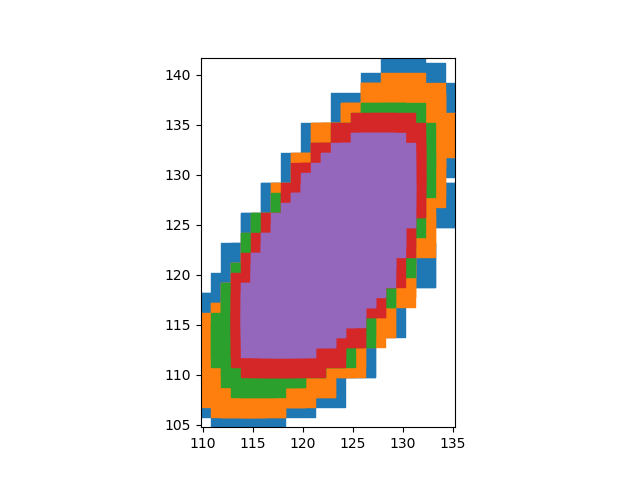

In [210]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect(1)
fig.canvas.draw()
for i in range(len(RCs)):
    plt.scatter((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta),marker='s', s=1000, label=i+1)
plt.show()

In [33]:
nbins = 2**8
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(datashifted, nbins, data_length_list,calc_matrix=True)

0.00390625


In [34]:
len(cds.G.nodes())

9167

In [35]:
#get recurrent components
cubes = cds.cubes
RCs = cds.get_recurrent_components()
len(RCs)

1

<IPython.core.display.Javascript object>


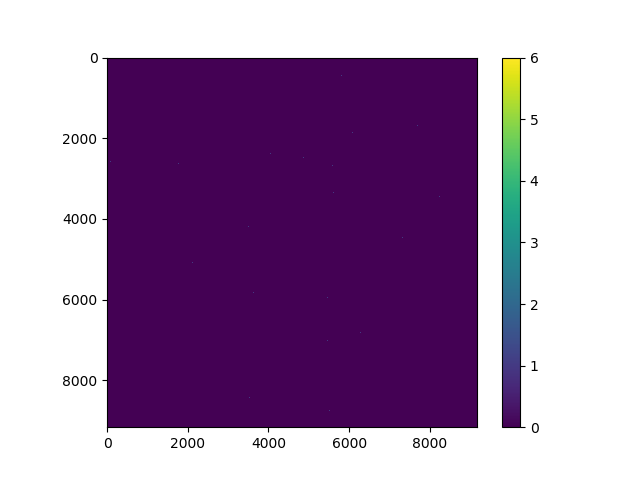

In [36]:
%matplotlib notebook

plt.imshow((cds.A**2).toarray())
plt.colorbar()

<IPython.core.display.Javascript object>


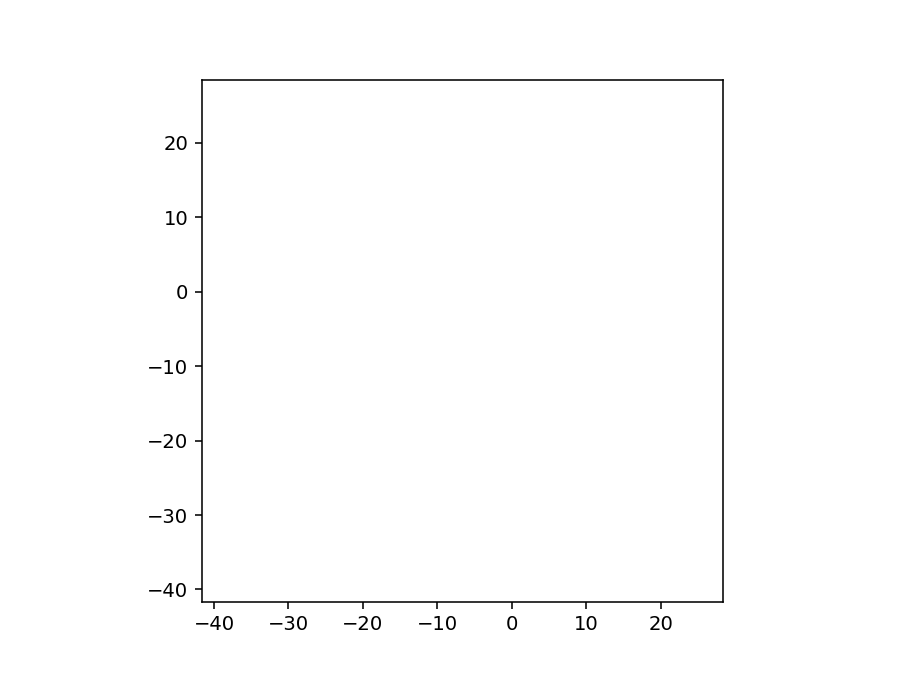

In [37]:
%matplotlib notebook
fig, ax = plt.subplots(dpi=141)
xhi = 70+np.min(data)
xlo = np.min(data)
ax.set_xlim(xlo, xhi)
ax.set_ylim(xlo, xhi)

ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width  / (xhi-xlo+1.) * delta*72./fig.dpi) ** 2))  

for i in range(len(RCs)):
    plt.plot((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), ',', label=i+1)
plt.show()

<IPython.core.display.Javascript object>


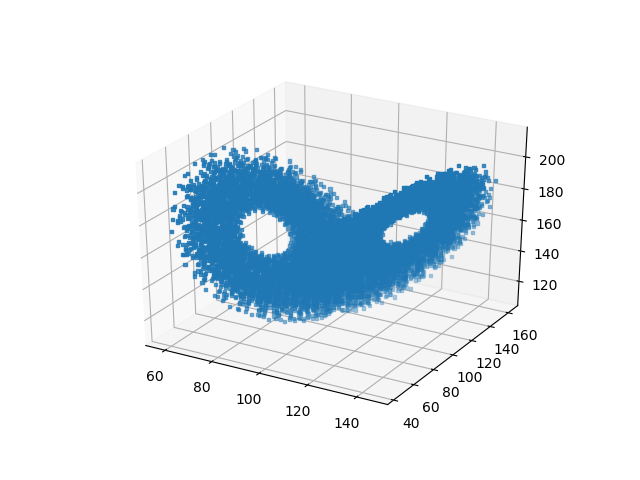

In [69]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.canvas.draw()
for i in range(len(RCs)):
    ax.scatter((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta), marker='s', s=5, label=i+1)
plt.show()

In [180]:
RCs = cds.get_recurrent_components(includeselfedges=False)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
#     for mstep in range(1):
#         M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
too many values to unpack (expected 4)
Component 2
Finding isolated nbhd
Calculating index pair
Calculating homology
           Forgetting 928 cells from B.
           H_0 = Z^4
           H_1 = Z^20
           H_0 = 0
           H_1 = Z^35
           Dim 0:	f (x1) = 0
           	f (x2) = 0
           	f (x3) = 0
           	f (x4) = 0
           Dim 1:	f (x1) = -y4 + y5 - y16 + y23 + y28
           	f (x2) = y6
           	f (x3) = y4 - y5 + y14 + y16
           	f (x4) = y2 + y4 - y5 + y16 - y28
           	f (x5) = y4 - y5 + y16
           	f (x6) = y1 + y4 - y5 + y16
           	f (x7) = y4 - y5 + y16 + y27 - y28
           	f (x8) = -y4 + y5 - y16 + y25
           	f (x9) = y9
           	f (x10) = y4 - y5 + y16 - y28 + y30
           	f (x11) = y4 - y5 + y16 + y26 - y28 + y30
           	f (x12) = -y4 + y5 - y7 - y16 + y28
           	f (x13) = y34
           	f (x14) = -y4 + y5 - y6 - y16 + y25
           	f (x15) = y4 - 

In [173]:
H = cds.maximal_closed_subgraph()
cds.G = H

In [21]:
cds.tuplecubes = cds.convert_indices_to_cubes(cds.G.nodes())

In [11]:
#write combinatorial map to file
cubefile, mapfile = cds.write_map_chompformat()
        
with open('all_map.map', 'w') as f:
    f.writelines(mapfile)
    
with open('all_cubes.cub', 'w') as f:
    f.writelines(cubefile)

In [102]:
cubes = cds.cubes
cubes = cds.convert_to_invertal_representation(cubes)
filetxt= cf.convert_to_chomp_format(cubes, delta)
with open('all_cubes.cub', 'w') as f:
    f.writelines(filetxt)

In [118]:
def convert_to_integertupleformat(cubical_set, delta):
    """Takes the cubical_set in coordindate representation to another representation for chomp
    (0.5, 1.5, 5.5)->[(0) (1) (5)] if delta=1"""
    itf = []
    for cube in cubical_set:
        print(np.array(cube)/delta)
        new = tuple(np.array(np.round((np.array(cube)/delta),decimals=1),dtype='int'))
        print(new)
        itf.append(new)
    return itf

In [25]:
P1graph = nx.subgraph(cds.G, P1)

In [26]:
P1graph

In [30]:
def write_mapandcubes(graph, delta, cds):
    """"""
    cubefile=''
    mapfile=''
    for i,j in enumerate(graph.nodes()):
        c=convert_to_integertupleformat(convert_indices_to_cubes([j], cds), delta)[0]
        cubefile+=str(c)+'\n'
        outedges = []
        for edge in graph.out_edges(j):
            outedges.append(edge[1])
        outedges = convert_indices_to_cubes(outedges, cds)
        intformat = convert_to_integertupleformat(outedges, delta)
        if list(outedges)!=[]:
            infs = ''
            for cint in intformat:
                infs+=str(cint)+' '
            mapfile+=str(c)+' -> {' + infs[:-1] + '}\n'
    return cubefile, mapfile

def convert_to_integertupleformat(cubical_set, delta):
    """Takes the cubical_set in coordindate representation to another representation for chomp
    (0.5, 1.5, 5.5)->[(0) (1) (5)] if delta=1"""
    itf = []
    for cube in cubical_set:
        new = tuple(np.array(np.round((np.array(cube)/delta), decimals=1),dtype='int'))
        itf.append(new)
    return itf

def convert_indices_to_cubes(indexset, cds):
    "Gets coordinates of the centres of cubes of set of cube indices (inverse of convert_cubes_to_indices)"
    cubicalset = set()
    for cube in indexset:
        cubicalset.add(cds.index_cube_dict[cube])
    return cubicalset

In [115]:
type(RCs[i])

list